In [195]:
#all packages and dataframes
import numpy as np
#import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline 
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
taskList=['mem','glass','semantic','motor']
modelList=['Log','Ridge','SVM']
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
thisDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/results/')
homeDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/')
figsDir = os.path.expanduser('~/Desktop/Porteretal_taskprediction/output/figures/')

In [196]:
#Fold level clustermap

subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10','groupwise']
group = pd.DataFrame()
for i in range(8):
    folds_within_sub = pd.DataFrame()
    for j in subList:
        tmp = pd.read_csv(thisDir+'Ridge/ALL_Binary/fw/subj_folds/'+str(i)+j+'.csv', header= None).T
        tmp.rename(columns = {0:str(j)},inplace=True)
        folds_within_sub=pd.concat([folds_within_sub, tmp], axis=1)
    folds_within_sub['fold'] = i
    group=pd.concat([group, folds_within_sub])
    
allTask_fw = group.pivot(columns = "fold")
allTask_fw_corr = allTask_fw.corr()
    
sem = pd.DataFrame()
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'semantic.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within = pd.concat([folds_within, tmp], axis = 1)
    folds_within['fold'] = j
    sem=pd.concat([sem, folds_within])
mem = pd.DataFrame() 
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'mem.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within = pd.concat([folds_within, tmp], axis = 1)
    folds_within['fold'] =j
    mem=pd.concat([mem, folds_within])
    
glass = pd.DataFrame()  
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'glass.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within=pd.concat([folds_within, tmp], axis=1)
    folds_within['fold'] = j
    glass = pd.concat([glass, folds_within])
    
motor = pd.DataFrame()  
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'motor.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within=pd.concat([folds_within, tmp], axis=1)
    folds_within['fold'] = j
    motor = pd.concat([motor, folds_within])
    

sem['type'] = "semantic"
mem['type'] = "memory"
glass['type'] = "coherence"
motor['type'] = "motor"
full_fw = pd.concat([sem, mem, glass, motor])

fw = full_fw.pivot(columns = ["type", "fold"])
fw_corr = fw.corr()


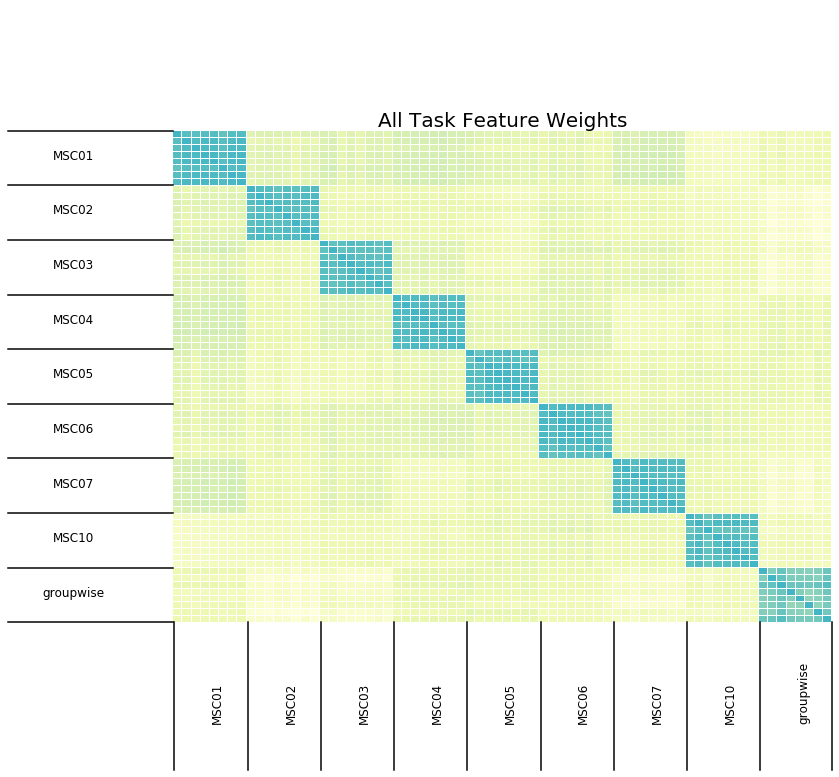

In [197]:
from itertools import groupby
import matplotlib.collections as collections
legend=[Line2D([0], [0], color='#37659e', lw=4,label='Memory'),
                   Line2D([0], [0], color='#348fa7', lw=4, label='Motor'),
                Line2D([0], [0], color='#40b7ad', lw=4,label='Semantic'),
                Line2D([0], [0], color='#413d7b', lw=4,label='Coherence')]
taskColors=dict([('coherence','#413d7b'),('semantic','#40b7ad'),('motor','#348fa7'),('memory','#37659e')])
def gw_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def gw_label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
def gw_final_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)    
    
def gw_label_group_bar_table(ax, df):
    xpos = -.25
    scale = 1./df.index.size
    pos = df.index.size
    for label, rpos in gw_label_len(df.index,0):
        gw_add_line(ax, pos*scale, xpos)
        pos -= rpos
        lypos = (pos + .5 * rpos)*scale
        ax.text(xpos+.1, lypos-.002, label, ha='center', transform=ax.transAxes, fontsize = 'large')
    gw_final_add_line(ax, pos*scale , xpos)
    xpos += .1
    
def gw_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([xpos+.02, xpos+.02], [ypos, ypos + .3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def gw_final_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([1,1], [0, -.3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def gw_Xlabel_group_bar_table(ax, df):
    ypos = -.3
    scale = 1./df.columns.size
    #pos = -1.26
    for level in range(df.columns.nlevels):
        if level ==0:
            pos = -5
        else:
            pos = -1.26
    for label, rpos in gw_label_len(df.columns,0):
        gw_Xadd_line(ax, pos*scale, ypos)
        pos += rpos
        lypos = (pos - .5 * rpos)*scale
        ax.text(lypos+.03,ypos+.1, label, ha='center', rotation='vertical',transform=ax.transAxes, fontsize ='large')
    gw_final_Xadd_line(ax, pos*scale , ypos)
    ypos += .1    



g = sns.clustermap(allTask_fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (15, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("All Task Feature Weights", fontsize=20, pad=5)
#plt.title("Correlation (r)", fontdict = {'fontsize':15}, pad = 10)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
g.cax.set_visible(False)
gw_label_group_bar_table(g.ax_heatmap, allTask_fw_corr)
gw_Xlabel_group_bar_table(g.ax_heatmap, allTask_fw_corr)
g.fig.subplots_adjust(left = 0.15)
#g.ax_cbar.tick_params(labelsize=12)

#plt.savefig(figsDir+'fw_across_sub_heatmap.png', bbox_inches='tight')



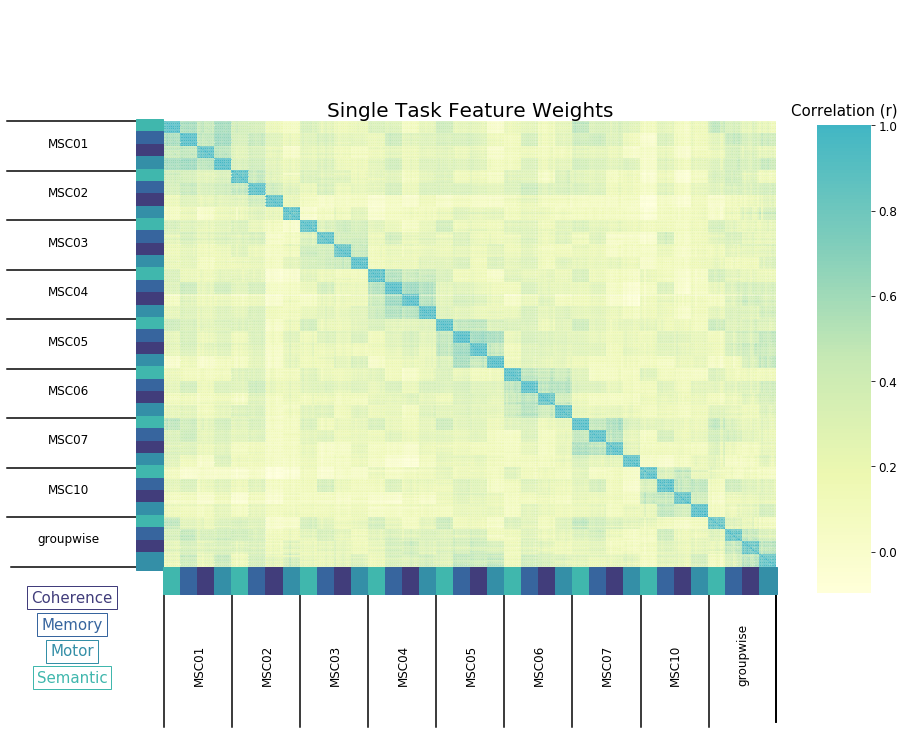

In [198]:
def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def final_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line) 
    
def final_x(ax):
    line = plt.Line2D([-.25, -.001], [0,0], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line) 
    
def Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([xpos+.07, xpos+.07], [ypos, ypos + .3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def final_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([1,1], [-.01, -.35], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]


def label_group_bar_table(ax, df):
    xpos = -.256
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            if level ==2:
                continue
            if level ==0:
                add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            if level ==1:
                ax.text(xpos+.132,lypos-.008, "test", color=taskColors[label], ha='center',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(xpos+.1, lypos-.002, label, ha='center', transform=ax.transAxes, fontsize = 'large')
        #final_add_line(ax, pos*scale , xpos)
        xpos += .1
    #final_add_line(ax, pos*scale , xpos)
    final_x(ax)

def Xlabel_group_bar_table(ax, df):
    ypos = -.36
    scale = 1/df.columns.size
    for level in range(df.columns.nlevels):
        if level == 0:
            pos = -20
        else:
            pos = -8#df.columns.size
        for label, rpos in label_len(df.columns,level):
            if level ==2:
                continue
            if level ==0:
                Xadd_line(ax, pos*scale, ypos)
            pos += rpos
            lypos = (pos + .5 * rpos)*scale
            if level == 1:
                ax.text(lypos,ypos+.211, 'test',color=taskColors[label], ha='center', rotation='vertical',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(lypos-.04,ypos+.1, label, ha='center', rotation='vertical',transform=ax.transAxes, fontsize = 'large')
        final_Xadd_line(ax, pos*scale , ypos)
        ypos += .1
        
g = sns.clustermap(fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",alpha = 200, cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (15, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("Single Task Feature Weights", fontsize=20, pad=5)
plt.title("Correlation (r)", fontdict = {'fontsize':15}, pad = 10)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
label_group_bar_table(g.ax_heatmap, fw_corr)
Xlabel_group_bar_table(g.ax_heatmap, fw_corr)
g.fig.subplots_adjust(left = 0.15)
g.ax_heatmap.text(-.15,-.14, "Memory", fontsize= 15, color=taskColors['memory'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['memory']))
g.ax_heatmap.text(-.15,-.2, "Motor", fontsize= 15, color=taskColors['motor'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['motor']))
g.ax_heatmap.text(-.15,-.08, "Coherence", fontsize= 15, color=taskColors['coherence'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['coherence']))
g.ax_heatmap.text(-.15,-.26, "Semantic", fontsize= 15, color=taskColors['semantic'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['semantic']))
g.ax_cbar.set_position([.9, 0.17, .05, .65])
g.ax_cbar.tick_params(labelsize=12)


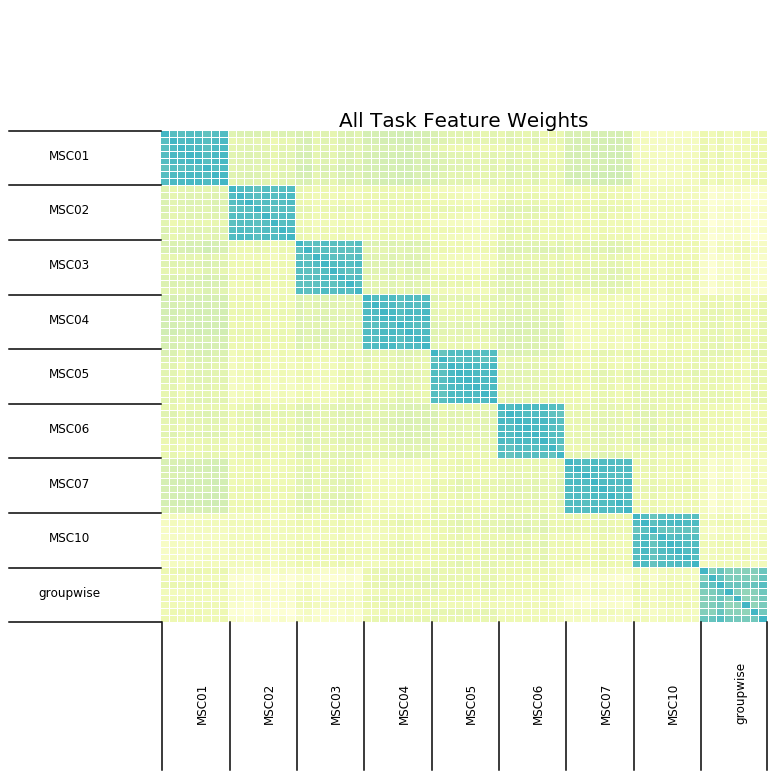

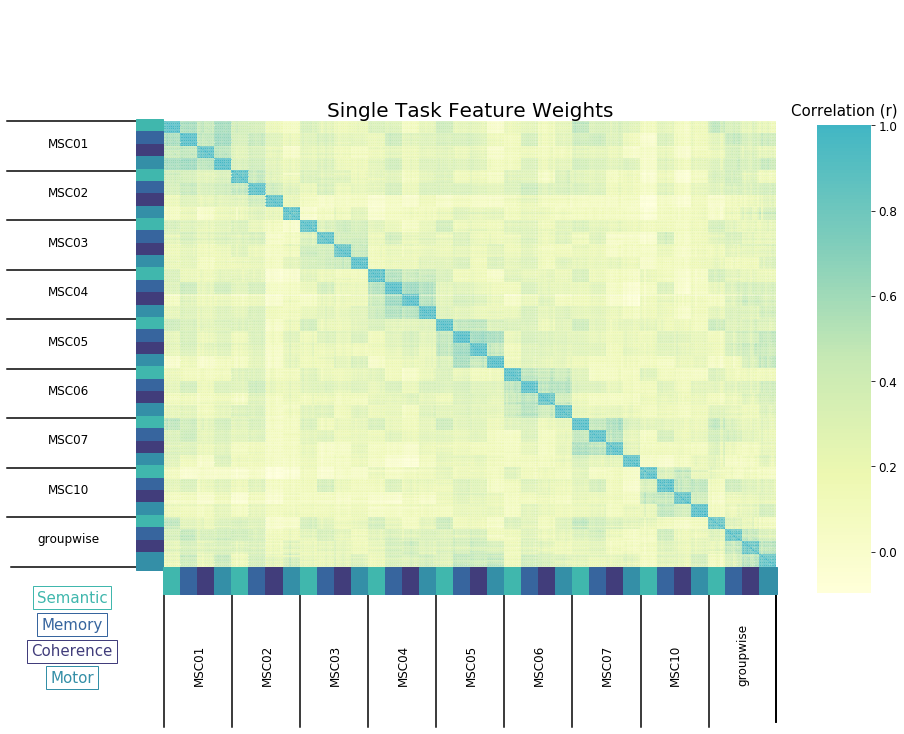

In [199]:



g = sns.clustermap(allTask_fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (12, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("All Task Feature Weights", fontsize=20, pad=5)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
g.cax.set_visible(False)
gw_label_group_bar_table(g.ax_heatmap, allTask_fw_corr)
gw_Xlabel_group_bar_table(g.ax_heatmap, allTask_fw_corr)
#g.fig.subplots_adjust(left = 0.15)
plt.savefig(figsDir+'allTask_groupcorr_folds.png', bbox_inches='tight')



g = sns.clustermap(fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",alpha = 200, cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (15, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("Single Task Feature Weights", fontsize=20, pad=5)
plt.title("Correlation (r)", fontdict = {'fontsize':15}, pad = 10)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
label_group_bar_table(g.ax_heatmap, fw_corr)
Xlabel_group_bar_table(g.ax_heatmap, fw_corr)
g.fig.subplots_adjust(left = 0.15)
g.ax_heatmap.text(-.15,-.14, "Memory", fontsize= 15, color=taskColors['memory'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['memory']))
g.ax_heatmap.text(-.15,-.26, "Motor", fontsize= 15, color=taskColors['motor'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['motor']))
g.ax_heatmap.text(-.15,-.2, "Coherence", fontsize= 15, color=taskColors['coherence'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['coherence']))
g.ax_heatmap.text(-.15,-.08, "Semantic", fontsize= 15, color=taskColors['semantic'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['semantic']))
g.ax_cbar.set_position([.9, 0.17, .05, .65])
g.ax_cbar.tick_params(labelsize=12)
plt.savefig(figsDir+'singeTask_groupcorr_folds.png', bbox_inches='tight')


In [182]:
#include max groupwise to show CG


#Fold level clustermap

subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10','groupwise', 'groupwiseMax']
group = pd.DataFrame()
for i in range(8):
    folds_within_sub = pd.DataFrame()
    for j in subList:
        tmp = pd.read_csv(thisDir+'Ridge/ALL_Binary/fw/subj_folds/'+str(i)+j+'.csv', header= None).T
        tmp.rename(columns = {0:str(j)},inplace=True)
        folds_within_sub=pd.concat([folds_within_sub, tmp], axis=1)
    folds_within_sub['fold'] = i
    group=pd.concat([group, folds_within_sub])
    
allTask_fw = group.pivot(columns = "fold")
allTask_fw_corr = allTask_fw.corr()
    
sem = pd.DataFrame()
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'semantic.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within = pd.concat([folds_within, tmp], axis = 1)
    folds_within['fold'] = j
    sem=pd.concat([sem, folds_within])
mem = pd.DataFrame() 
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'mem.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within = pd.concat([folds_within, tmp], axis = 1)
    folds_within['fold'] =j
    mem=pd.concat([mem, folds_within])
    
glass = pd.DataFrame()  
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'glass.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within=pd.concat([folds_within, tmp], axis=1)
    folds_within['fold'] = j
    glass = pd.concat([glass, folds_within])
    
motor = pd.DataFrame()  
for j in range(8):
    folds_within = pd.DataFrame()
    for i in subList:
        tmp = pd.read_csv(thisDir+'Ridge/single_task/fw/subj_folds/'+str(j)+i+'motor.csv', header= None).T
        tmp.rename(columns = {0:i},inplace=True)
        folds_within=pd.concat([folds_within, tmp], axis=1)
    folds_within['fold'] = j
    motor = pd.concat([motor, folds_within])
    

sem['type'] = "semantic"
mem['type'] = "memory"
glass['type'] = "coherence"
motor['type'] = "motor"
full_fw = pd.concat([sem, mem, glass, motor])

fw = full_fw.pivot(columns = ["type", "fold"])
fw_corr = fw.corr()



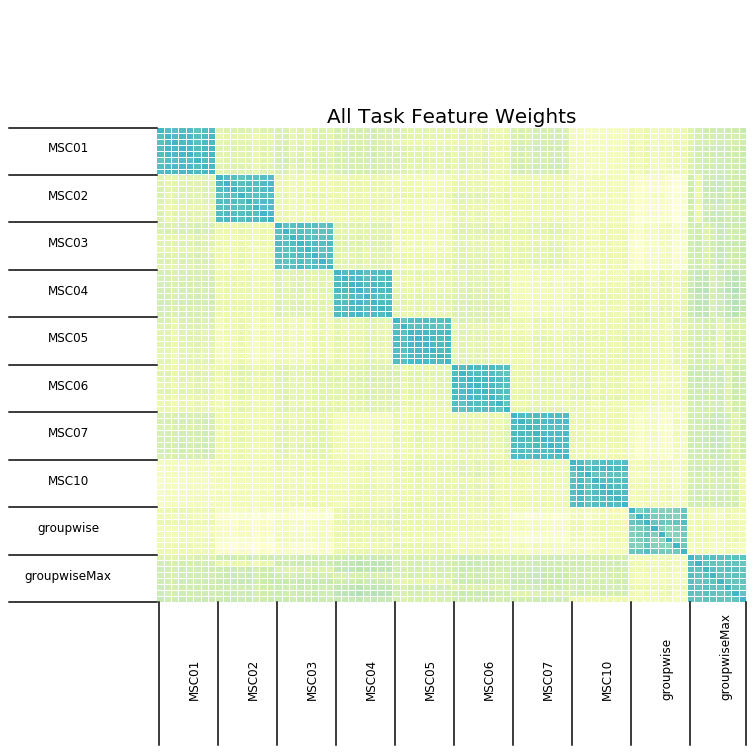

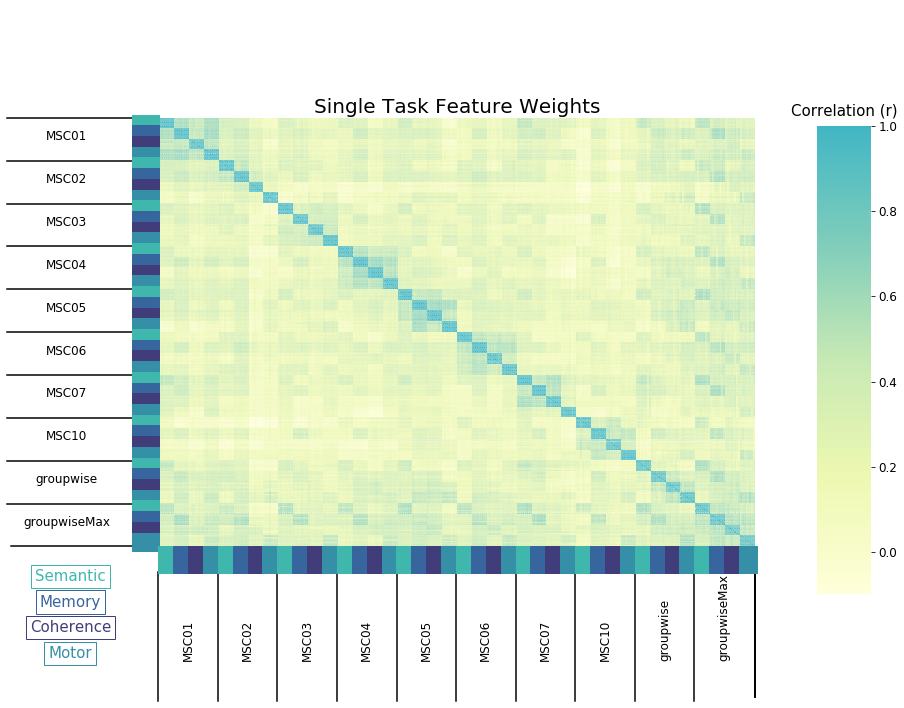

In [194]:
g = sns.clustermap(allTask_fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (12, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("All Task Feature Weights", fontsize=20, pad=5)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
g.cax.set_visible(False)
gw_label_group_bar_table(g.ax_heatmap, allTask_fw_corr)
gw_Xlabel_group_bar_table(g.ax_heatmap, allTask_fw_corr)
#g.fig.subplots_adjust(left = 0.15)
#plt.savefig(figsDir+'allTask_groupcorr_folds_max.png', bbox_inches='tight')


def add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos+ .25], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)

def final_add_line(ax, xpos, ypos):
    line = plt.Line2D([ypos, ypos], [xpos, xpos], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line) 
    
def final_x(ax):
    line = plt.Line2D([-.25, -.001], [0,0], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line) 
    
def Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([xpos+.06, xpos+.06], [ypos, ypos + .3], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def final_Xadd_line(ax, xpos, ypos):
    line = plt.Line2D([1,1], [-.01, -.35], color='black', transform=ax.transAxes)
    line.set_clip_on(False)
    ax.add_line(line)  
    
def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]


def label_group_bar_table(ax, df):
    xpos = -.256
    scale = 1./df.index.size
    for level in range(df.index.nlevels):
        pos = df.index.size
        for label, rpos in label_len(df.index,level):
            if level ==2:
                continue
            if level ==0:
                add_line(ax, pos*scale, xpos)
            pos -= rpos
            lypos = (pos + .5 * rpos)*scale
            if level ==1:
                ax.text(xpos+.132,lypos-.008, "test", color=taskColors[label], ha='center',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(xpos+.1, lypos-.002, label, ha='center', transform=ax.transAxes, fontsize = 'large')
        #final_add_line(ax, pos*scale , xpos)
        xpos += .1
    #final_add_line(ax, pos*scale , xpos)
    final_x(ax)

def Xlabel_group_bar_table(ax, df):
    ypos = -.36
    scale = 1/df.columns.size
    for level in range(df.columns.nlevels):
        if level == 0:
            pos = -20
        else:
            pos = -8#df.columns.size
        for label, rpos in label_len(df.columns,level):
            if level ==2:
                continue
            if level ==0:
                Xadd_line(ax, pos*scale, ypos)
            pos += rpos
            lypos = (pos + .5 * rpos)*scale
            if level == 1:
                ax.text(lypos,ypos+.211, 'test',color=taskColors[label], ha='center', rotation='vertical',transform=ax.transAxes,bbox=dict(facecolor=taskColors[label], edgecolor= taskColors[label]))
            else:
                ax.text(lypos-.04,ypos+.1, label, ha='center', rotation='vertical',transform=ax.transAxes, fontsize = 'large')
        final_Xadd_line(ax, pos*scale , ypos)
        ypos += .1
        

g = sns.clustermap(fw_corr, center = 1, row_cluster = False, col_cluster = False, cmap = "YlGnBu",alpha = 200, cbar_kws={'shrink':1.3}, yticklabels = True, xticklabels = True, linewidths = 0.004, figsize = (15, 10))
g.ax_heatmap.yaxis.set_ticks_position("left")
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize = 10)
g.ax_heatmap.set_title("Single Task Feature Weights", fontsize=20, pad=5)
plt.title("Correlation (r)", fontdict = {'fontsize':15}, pad = 10)
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_xlabel('')
g.ax_heatmap.set_ylabel('')
label_group_bar_table(g.ax_heatmap, fw_corr)
Xlabel_group_bar_table(g.ax_heatmap, fw_corr)
g.fig.subplots_adjust(left = 0.15)
g.ax_heatmap.text(-.15,-.14, "Memory", fontsize= 15, color=taskColors['memory'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['memory']))
g.ax_heatmap.text(-.15,-.26, "Motor", fontsize= 15, color=taskColors['motor'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['motor']))
g.ax_heatmap.text(-.15,-.2, "Coherence", fontsize= 15, color=taskColors['coherence'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['coherence']))
g.ax_heatmap.text(-.15,-.08, "Semantic", fontsize= 15, color=taskColors['semantic'], ha='center',transform=g.ax_heatmap.transAxes,bbox=dict(facecolor='none', edgecolor= taskColors['semantic']))
g.ax_cbar.set_position([.9, 0.17, .05, .65])
g.ax_cbar.tick_params(labelsize=12)
plt.savefig(figsDir+'singeTask_groupcorr_folds_max.png', bbox_inches='tight')


In [191]:
fw_corr.columns.get_level_values(1)

Index(['semantic', 'semantic', 'semantic', 'semantic', 'semantic', 'semantic',
       'semantic', 'semantic', 'memory', 'memory',
       ...
       'coherence', 'coherence', 'motor', 'motor', 'motor', 'motor', 'motor',
       'motor', 'motor', 'motor'],
      dtype='object', name='type', length=320)